In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [2]:
#import csv file
df = pd.read_csv("C:/Users/Admin/Phân tích dữ liệu kinh doanh/Test/BTC.csv", sep=";")
df


,Date,Price,Open,High,Low,Vol,Change
0,01/01/2018,13444.9,13850.5,13921.5,12877.7,78430,-0.0293
1,01/02/2018,14754.1,13444.9,15306.1,12934.2,137730,0.0974
2,01/03/2018,15156.6,14754.1,15435.0,14579.7,106540,0.0273
3,01/04/2018,15180.1,15156.5,15408.7,14244.7,110970,0.0015
4,01/05/2018,16954.8,15180.1,17126.9,14832.4,141960,0.1169
...,...,...,...,...,...,...,...
1938,4/23/2023,27591.4,27813.8,27815.0,27388.5,41770,-0.0080
1939,4/24/2023,27509.3,27591.4,27978.8,27054.3,66740,-0.0030
1940,4/25/2023,28298.8,27510.1,28375.6,27201.1,65310,0.0287
1941,4/26/2023,28424.6,28298.8,29995.7,27307.8,164310,0.0044


In [3]:
# preview the dataset
df.head()

,Date,Price,Open,High,Low,Vol,Change
0,01/01/2018,13444.9,13850.5,13921.5,12877.7,78430,-0.0293
1,01/02/2018,14754.1,13444.9,15306.1,12934.2,137730,0.0974
2,01/03/2018,15156.6,14754.1,15435.0,14579.7,106540,0.0273
3,01/04/2018,15180.1,15156.5,15408.7,14244.7,110970,0.0015
4,01/05/2018,16954.8,15180.1,17126.9,14832.4,141960,0.1169


In [4]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1943 entries, 0 to 1942
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1943 non-null   object 
 1   Price   1943 non-null   float64
 2   Open    1943 non-null   float64
 3   High    1943 non-null   float64
 4   Low     1943 non-null   float64
 5   Vol     1943 non-null   int64  
 6   Change  1943 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 106.4+ KB


In [5]:
# check missing values in variables
df.isnull().sum()

Date      0
Price     0
Open      0
High      0
Low       0
Vol       0
Change    0
dtype: int64

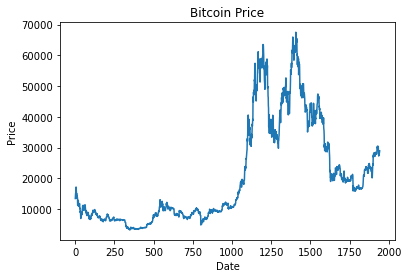

In [6]:
# Plot the time series
plt.plot(df.Price)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Price')
plt.show()

In [7]:
# Select the features and target variable
X = df.drop(['Date','Price'], axis=1)

y = df['Price']

In [8]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [9]:
# Train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:
# Make predictions on the test data
y_pred = rf.predict(X_test)

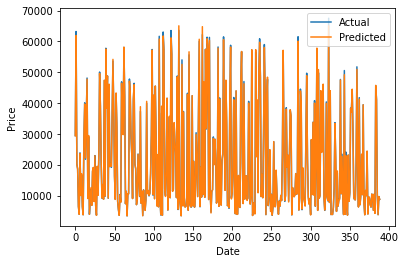

In [11]:
# Plot the predicted vs. actual Bitcoin prices
plt.plot(y_test.values,label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [12]:
# calculate the RMSE
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
print("RMSE:", rmse)

# calculate the MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("MAPE:", mape)

# calculate the MAE
mae = np.mean(np.abs(y_test - y_pred))
print("MAE:", mae)

RMSE: 463.6999460650165
MAPE: 1.1365689248923037
MAE: 252.7364035989715
